<h2 align="center">Exploratory Analysis for San Francisco Bay "Ford GoBike" system data,2019</h2> 
 <h3 align="center">by (Richard Achiak)</h3>

## Introduction
Ford GoBike, like other bike share systems,consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.
The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.
### The dataset has the following variables captured;
- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type 
- Member_gender
- Member_birth_year
- Bike_share_for_all_trips

## Table of Contents
1. Introduction
2. Preliminary Wrangling
    - Structure of dataset
    - Main features of interest
    - Additional featurs of interest
3. Additional Wrongling
    - Data Assesment Results
    - Cleaning variables with wrong dtypes
    - Cleaning variables with missing entries
4. Univariate Exploration
    - Discussion the distributions of variables of interest
    - Discussion the unusual distributions, operations and changes made to dataset
5. Bivariate Exploration
    - Relationship observed from this investigation
    - Interesting relationships observed
6. Multivariate Exploration
    - Relationship observed from this investigation
    - Interesting or surprising interactions
7. Conclusions

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df_userinfo = pd.read_csv('fordgobike_tripdata.csv')
df_userinfo.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df_userinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [4]:
df_userinfo.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [5]:
df_userinfo.duplicated().sum()

0

In [6]:
df_userinfo.shape

(183412, 16)

### What is the structure of your dataset?

> The dataset contains 183,412 rows and 16 columns with the following column names ('duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude','start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type','member_birth_year', 'member_gender', 'bike_share_for_all_trip').

### What is/are the main feature(s) of interest in your dataset?

> Out of the 16 column features, I would want to look at the interactions of the following features;
1. What time of the day, day of the week are most trips taken?
2. How long does the average trip take?
3. Age distribution among users
4. Gender distribution among users
5. User type distribution

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
> Additional features that will help support the main features of interest, I believe extracting and adding additional columns such as time of the day, day of the week and month of year from the start_time will help support my investigation into my main objectives listed above.I must also convert the member birth year to age in order to get my age groups.

## Additional Wrangling

In [7]:
df_userinfo.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### Data Assesment Results

>Quality Issues
### The following variables were given wrong datatypes
1. start_time and end_time columns in object dtype instead of datetime 
2. start_station_id and end_station_id columns in float dtype instead of object
3. bike_id column in int64 dtype instead of object
4. user_type in object dtype instead of category
5. member_birth_year in float dtype instead of datetime
6. member_gender in object dtype instead of category
7. bike_share_for_all_trip in object dtype instead of category

### The following variables have some entries missing
1. start_station_id 
2. start_station_name
3. end_station_id
4. end_station_name
5. member_birth_year
6. member_gender

>I have to make a copy of the data before making any changes to the original data

In [8]:
df_userinfo_clean = df_userinfo.copy()

### Cleaning variable with wrong data types

>Define: Change all columns dtype based on their values

>Code:

In [9]:
df_userinfo_clean.start_time = pd.to_datetime(df_userinfo_clean.start_time)
df_userinfo_clean.end_time = pd.to_datetime(df_userinfo_clean.end_time)

df_userinfo_clean.start_station_id = df_userinfo_clean.start_station_id.astype(object)
df_userinfo_clean.end_station_id = df_userinfo_clean.end_station_id.astype(object)
df_userinfo_clean.bike_id = df_userinfo_clean.bike_id.astype(object)
df_userinfo_clean.member_birth_year = df_userinfo_clean.member_birth_year.astype(object)

df_userinfo_clean.user_type = df_userinfo_clean.user_type.astype('category')
df_userinfo_clean.member_gender = df_userinfo_clean.member_gender.astype('category')
df_userinfo_clean.bike_share_for_all_trip = df_userinfo_clean.bike_share_for_all_trip.astype('category')

>Test:

In [10]:
df_userinfo_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null object
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null object
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null object
user_type                  183412 non-null category
member_birth_year          175147 non-null object
member_gender              175147 non-null category
bike_share_for_all_trip    183412 non-null category
dtypes: category(3), datetime64[ns](2), float64(4), int64(1), ob

### Cleaning variables with missing entries

>Define: Drop all rows with missing values

>Code:

In [11]:
#start_station_id, start_station_name, end_station_id and end_station_name have corresponding missing values
#member_birth_year and member_gender also have corresponding missing values

df_userinfo_clean = df_userinfo_clean[df_userinfo_clean['start_station_id'].isnull() == False]
df_userinfo_clean = df_userinfo_clean[df_userinfo_clean['member_birth_year'].isnull() == False]

>Test:

In [12]:
df_userinfo_clean.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

>Define: Extract year, month, day of the week, start hour and time of the day from "start_time" column

>Code:

In [13]:
# extract year and month
df_userinfo_clean['year'] = df_userinfo_clean['start_time'].dt.year
df_userinfo_clean['month'] = df_userinfo_clean['start_time'].dt.month

# extract day of the week
df_userinfo_clean['day_of_week'] = pd.DatetimeIndex(df_userinfo_clean['start_time']).strftime('%A')

# extract the time of the day
df_userinfo_clean['start_hour'] = df_userinfo_clean['start_time'].apply(lambda time: time.hour)
df_userinfo_clean['time_of_day'] = 'Morning'
df_userinfo_clean['time_of_day'][(df_userinfo_clean['start_hour'] >= 12) & (df_userinfo_clean['start_hour'] <= 17)] = 'Afternoon'
df_userinfo_clean['time_of_day'][(df_userinfo_clean['start_hour'] >= 18) & (df_userinfo_clean['start_hour'] <= 23)] = 'Night'

>Test:

In [14]:
df_userinfo_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,year,month,day_of_week,start_hour,time_of_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984,Male,No,2019,2,Thursday,17,Afternoon
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972,Male,No,2019,2,Thursday,12,Afternoon
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989,Other,No,2019,2,Thursday,17,Afternoon
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974,Male,Yes,2019,2,Thursday,23,Night
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,...,5200,Subscriber,1959,Male,No,2019,2,Thursday,23,Night


>Define: Compute the age by subtracting 'member_birth_year' from 'year' column

>Code:

In [15]:
# first convert "year" to object dtype
df_userinfo_clean.year = df_userinfo_clean.year.astype(object)

df_userinfo_clean['member_age'] = df_userinfo_clean.apply(lambda x: x['year'] - x['member_birth_year'], axis=1)

>Test:

In [16]:
df_userinfo_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,year,month,day_of_week,start_hour,time_of_day,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,Customer,1984,Male,No,2019,2,Thursday,17,Afternoon,35.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972,Male,No,2019,2,Thursday,12,Afternoon,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,Subscriber,1989,Other,No,2019,2,Thursday,17,Afternoon,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,Subscriber,1974,Male,Yes,2019,2,Thursday,23,Night,45.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,...,Subscriber,1959,Male,No,2019,2,Thursday,23,Night,60.0


In [17]:
# Find out the minimum and maximum ages
df_userinfo_clean['member_age'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

>Define:Bind the member_age into age groups

>ode:

In [18]:
df_userinfo_clean.loc[df_userinfo_clean['member_age']<=20, 'Age_group'] = '11-20 yrs'
df_userinfo_clean.loc[df_userinfo_clean['member_age'].between(21,30), 'Age_group'] = '21-30 yrs'
df_userinfo_clean.loc[df_userinfo_clean['member_age'].between(31,40), 'Age_group'] = '31-40 yrs'
df_userinfo_clean.loc[df_userinfo_clean['member_age'].between(41,50), 'Age_group'] = '41-50 yrs'
df_userinfo_clean.loc[df_userinfo_clean['member_age'].between(51,60), 'Age_group'] = '51-60 yrs'
df_userinfo_clean.loc[df_userinfo_clean['member_age'].between(61,70), 'Age_group'] = '61-70 yrs'
df_userinfo_clean.loc[df_userinfo_clean['member_age'].between(71,80), 'Age_group'] = '71-80 yrs'
df_userinfo_clean.loc[df_userinfo_clean['member_age']>80, 'Age_group'] = '80+ yrs'

>Test:

In [19]:
df_userinfo_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,year,month,day_of_week,start_hour,time_of_day,member_age,Age_group
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,1984,Male,No,2019,2,Thursday,17,Afternoon,35.0,31-40 yrs
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,1972,Male,No,2019,2,Thursday,12,Afternoon,47.0,41-50 yrs
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,1989,Other,No,2019,2,Thursday,17,Afternoon,30.0,21-30 yrs
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,1974,Male,Yes,2019,2,Thursday,23,Night,45.0,41-50 yrs
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,...,1959,Male,No,2019,2,Thursday,23,Night,60.0,51-60 yrs


>Define: Drop all unwanted columns from the dataframe

>Code:

In [20]:
df_userinfo_clean.drop(['start_time','end_time','start_station_id','bike_id','start_station_latitude','start_station_longitude','end_station_id','end_station_latitude','end_station_longitude','member_birth_year','year','month'], inplace=True, axis=1)

>Test:

In [21]:
df_userinfo_clean.head()

,duration_sec,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,day_of_week,start_hour,time_of_day,member_age,Age_group
0,52185,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,Male,No,Thursday,17,Afternoon,35.0,31-40 yrs
2,61854,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,Male,No,Thursday,12,Afternoon,47.0,41-50 yrs
3,36490,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,Other,No,Thursday,17,Afternoon,30.0,21-30 yrs
4,1585,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,Male,Yes,Thursday,23,Night,45.0,41-50 yrs
5,1793,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,Male,No,Thursday,23,Night,60.0,51-60 yrs


>Define:Save the cleaned dataset to a new file

>Code:

In [22]:
df_userinfo_clean.to_csv('2019_fordgobike_tripdata.csv',index=False)

>Test:

In [23]:
df=pd.read_csv('2019_fordgobike_tripdata.csv')
df.head()

,duration_sec,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,day_of_week,start_hour,time_of_day,member_age,Age_group
0,52185,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,Male,No,Thursday,17,Afternoon,35.0,31-40 yrs
1,61854,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,Male,No,Thursday,12,Afternoon,47.0,41-50 yrs
2,36490,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,Other,No,Thursday,17,Afternoon,30.0,21-30 yrs
3,1585,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,Male,Yes,Thursday,23,Night,45.0,41-50 yrs
4,1793,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,Male,No,Thursday,23,Night,60.0,51-60 yrs


## Univariate Exploration

### Load master dataset and begin with the Univariate Exploration

In [24]:
df=pd.read_csv('2019_fordgobike_tripdata.csv')

Lets start by looking at the distribution of the main variables of interest, 
1. time_of_day
2. day_of_week
3. duration_sec
4. Member_gender
5. age_group
6. user_type


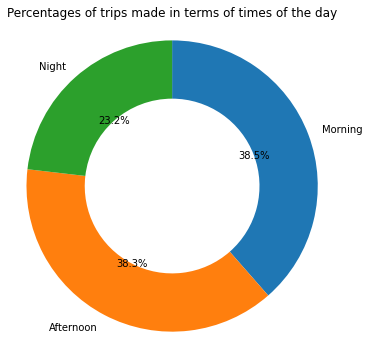

In [25]:
# Get the percentage count of trips made in terms of times of the day
time_of_day = (df['time_of_day'].value_counts()/df['time_of_day'].count())*100

plt.figure(figsize=[12, 6])
plt.pie(time_of_day, labels = time_of_day.index, autopct='%1.1f%%', startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.title('Percentages of trips made in terms of times of the day', fontsize=12);
plt.axis('square');

*It is seen from the pie chart that most trips were done at morning (00:00 - 11:59 hours) representing 38.5%, followed closely by afternoon (12:00 - 17:59 hours) representing 38.3%. Night had 23.2% of all users which is reasonable.*

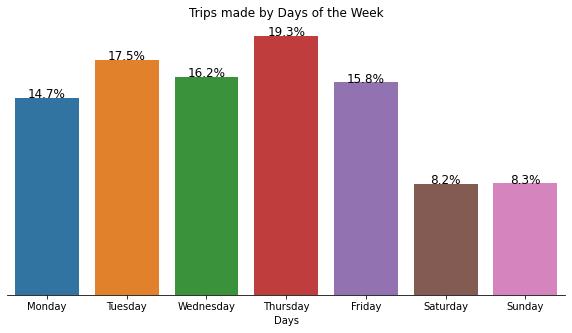

In [26]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=[10, 5])
ax = sns.countplot(data = df, x = 'day_of_week', order=weekday)

n_points = df.shape[0]
user_counts = df['day_of_week'].value_counts()
locs, labels = plt.xticks()

# print frequency on the bar chart
for loc, label in zip(locs, labels):
    count = user_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha='center', fontsize=12)


plt.title('Trips made by Days of the Week')
plt.xlabel('Days')

# Remove borderline features 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks([])
plt.ylabel('')

plt.show()

*Most trip were done on midweek which is Thursday as seen in the plot, this was followed by Tuesday and wednesday respectively. Weekends seem the list patronage of this service.*

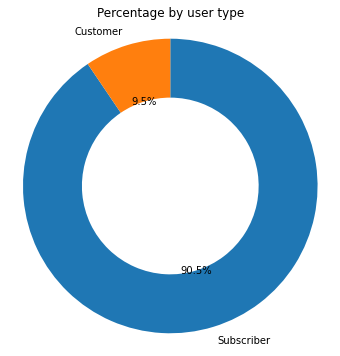

In [27]:
# Get the percentage count by user types
users = (df['user_type'].value_counts()/df['user_type'].count())*100

plt.figure(figsize=[12, 6])
plt.pie(users, labels = users.index, autopct='%1.1f%%', startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.title('Percentage by user type', fontsize=12);
plt.axis('square');

*As it is seen above, most trips representing 90.5% were taken by subscribers with the remaining 9.5% being just casual riders. This shows how subscribers are making efficient use of thier subscription.*

<Figure size 864x432 with 0 Axes>

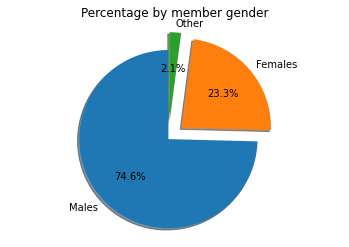

In [28]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Males', 'Females', 'Other'
sizes = [74.59, 23.32, 2.08];
explode = (0, 0.2, 0.2); # only "explode" the 2nd and 3rd slice (i.e. 'female' and 'others')

plt.figure(figsize=[12, 6]);
fig1, ax1 = plt.subplots();
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90);
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage by member gender', fontsize=12);
plt.show();


*Also, male riders were more than 3 times that of female riders as seen in the plot above, males represent 74.6% of the trips made entire period and females represent only 23.3% while other had a share of 2.1%.*

### Lets look onto the duration made in seconds by users averagely.

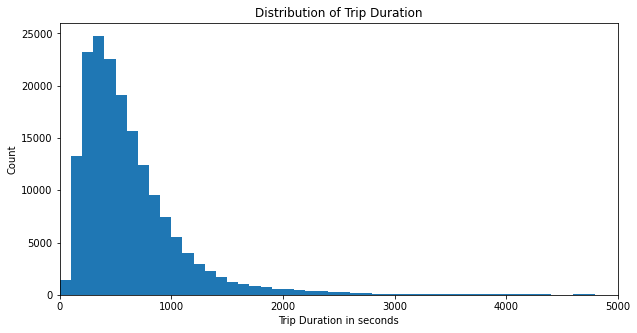

In [29]:
binsize = 100
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df, x = 'duration_sec', bins=bins)
plt.xlim(0, 5000)
plt.xlabel('Trip Duration in seconds')
plt.ylabel('Count')
plt.title('Distribution of Trip Duration')

plt.show()

*The plot looked skewed to the right making it view difficult. I have to convert the seconds to minutes in other to have a clear picture of my plot.*

In [30]:
# convert trip duration in seconds to minutes
df['duration_min'] = df['duration_sec'] / 60
# drop the 'duration_sec" column
df.drop('duration_sec' , axis = 1 , inplace = True)

# show
df.head()

,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,day_of_week,start_hour,time_of_day,member_age,Age_group,duration_min
0,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,Male,No,Thursday,17,Afternoon,35.0,31-40 yrs,869.750000
1,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,Male,No,Thursday,12,Afternoon,47.0,41-50 yrs,1030.900000
2,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,Other,No,Thursday,17,Afternoon,30.0,21-30 yrs,608.166667
3,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,Male,Yes,Thursday,23,Night,45.0,41-50 yrs,26.416667
4,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,Male,No,Thursday,23,Night,60.0,51-60 yrs,29.883333


The duration of an average trip was 11.73 minutes.


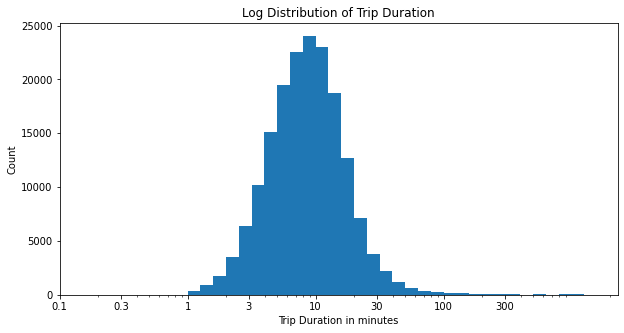

In [31]:
# get the average trip duration
average = np.round(df['duration_min'].mean(),2)
print("The duration of an average trip was %s minutes."%(average))

# trip duration distribution in log scale transformation
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(df['duration_min'].max())+log_binsize, log_binsize)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=[10, 5])
plt.hist(data = df, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Trip Duration in minutes')
plt.ylabel('Count')
plt.title('Log Distribution of Trip Duration')

plt.show()

*When the duration in seconds is converted to minutes and plotted on a log-scale transformation, the distribution looks highly unimodal, with a peak at 10 minutes. The average trip duration is also around 12 minutes.*

### Lets take a dive onto the age group distribution among users

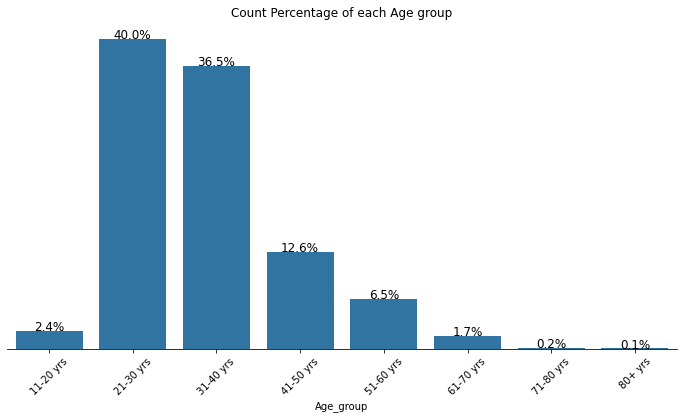

In [32]:
# Choose the first tuple of RGB colors
base_color = sns.color_palette()[0]
plt.figure(figsize=[12, 6])

# Plot the age groups on a Horizontal bar chart
Age = df['Age_group'].value_counts().index
ax = sns.countplot(data=df.sort_values(['Age_group']), x='Age_group', color=base_color);

n_points = df.shape[0]
user_counts = df['Age_group'].value_counts()
locs, labels = plt.xticks()

# print frequency on the bar chart
for loc, label in zip(locs, labels):
    count = user_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha='center',fontsize=12)

plt.title('Count Percentage of each Age group')
# Remove borderline features 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks([])
plt.ylabel('')

# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=45);


*As it is seen, mojority of the gobike users are between the ages of 21 to 40 years respectively as these age groups constitute almost 80% of all users.*

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Converting duration in seconds to minutes, geting users age out of the member birth year and the year the dataset was recorded were few of the manipulations I employ to gain insight into my variables of interest.
Looking at the average trip seconds by a user, it was notice that out plot was skewed to the right,duration had to be converted from seconds to minutes and a log transformation was used in plotting and the resulting distribution was seen to be slightly unimodal with the peak around 10 minutes while the mean of the distribution was also around 12 minutes.

Age was also bined in groups of 8 bins in other to traet possible outliers.

The following summarizes my findings;

1. The day of the week with the most trips was found to be Thursday, followed closely by Tuesday and wednesday. Meaning Most clients do riding at mid-week.
2. Concerning time of the day, Afternoon (12:00 - 17:59 hours) had the most rides followed by Morning (00:00 - 11:59 hours)
3. Most trips were done by subscribers representing a whopping 90% of all trips.
4. Almost 75% of users of the gobike system for 2019 were males representing 3 times that of other users.
5. Most trips were done at morning and afternoon.
6. Mojority of the gobike users are between the ages of 21 to 40 years respectively as these age groups constitute almost 80% of all users.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
The dataset was found to have some quality issues such as wrong 'dtypes' for column values as well as missing entries.
Some adjustments were made to the dataset to correct the wrong dtypes and also remove all missingness.
Variables of interest which were not outright containing information needed were also adjusted to answer my questions of interest. 
Lastly, unwanted columns were droped to make the data tidy.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

## Plot the distribution of member gender and user type

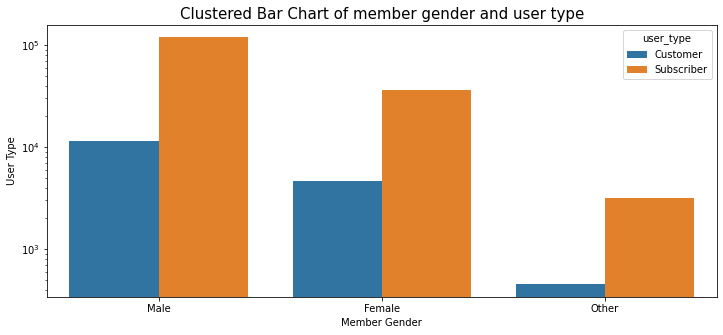

In [33]:

plt.figure(figsize = [12, 5])

ax = sns.countplot(data = df, x = 'member_gender', hue = 'user_type', order=['Male','Female','Other']);
plt.title('Clustered Bar Chart of member gender and user type', fontsize=15);
ax.set_yscale('log')
plt.xlabel('Member Gender');
plt.ylabel('User Type');

*As seen with clustered bar chart above, subscribers were nearly evenly distributed among member gender.*

## Age distribution among member gender as well as among user type 

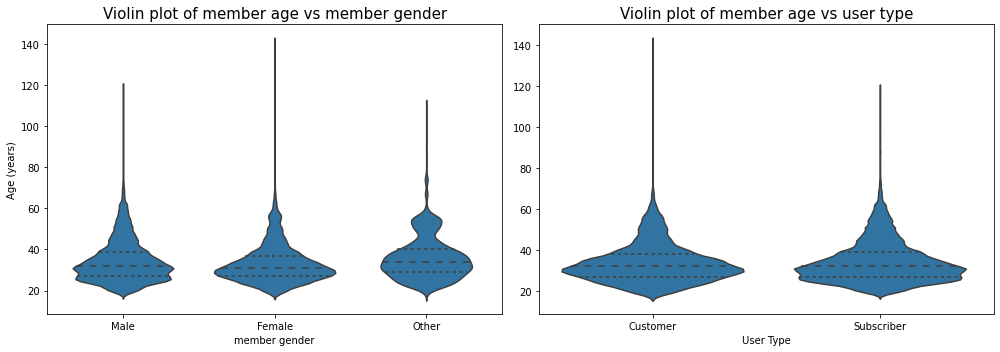

In [34]:
plt.figure(figsize = [14, 5],tight_layout=True)

#on the left - violin plot for member age - member gender distribution
plt.subplot(1, 2, 1)
sns.violinplot(data=df, x='member_gender', y='member_age', color = base_color, inner = 'quartile', order=['Male','Female','Other']);
plt.title('Violin plot of member age vs member gender', fontsize=15)
plt.xlabel('member gender');
plt.ylabel('Age (years)');

#on the right - violin plot of member age - user type distribution
plt.subplot(1, 2, 2)
sns.violinplot(data=df, x='user_type', y='member_age', color = base_color, inner = 'quartile');
plt.title('Violin plot of member age vs user type', fontsize=15);
plt.xlabel('User Type');
plt.ylabel('');

1. *All member gender having almost the same average age and containing a number of outliers.*
3. *The same average age for both subscribers and customers*

### Does day_of _ week with most trips dependent on user- type?

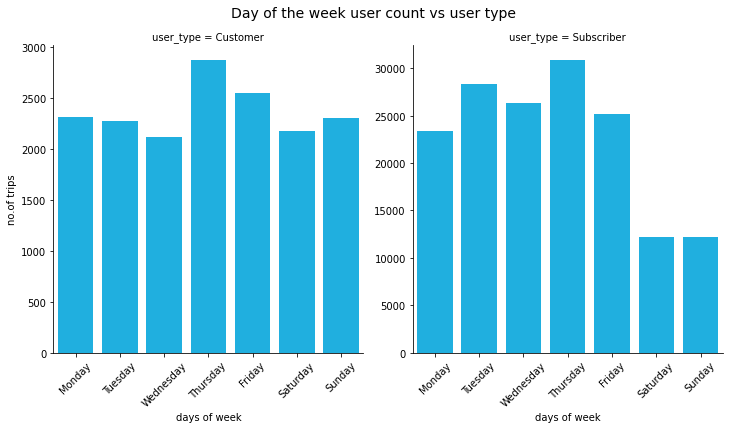

In [35]:
#on the left - catplot of days of week with most trips vs customer users
#on the right - catplot of days of week with most trips vs subscribed users
g = sns.catplot(data=df, x='day_of_week', col="user_type", kind='count', sharey = False, color = 'deepskyblue', order = weekday)
g.set_axis_labels("days of week", "no.of trips")
g.add_legend()
g.fig.suptitle('Day of the week user count vs user type', y=1.04, fontsize=14);

g.set_xticklabels(rotation = 45);

*As seen in the plot above,Thursday was the day of the week with most trips done and do not show any dependency of user type being it (subscribers or customers). The plot also shows that Customers often use the service at weekends where as Subscribers mostly use the service at regular weekdays. This could mean that subscribers might be regularly using the bikes for work and home commute purposes and customers use it for recreational activities at weekends only.*

### Does time of the day  with most trips dependent on user- type?

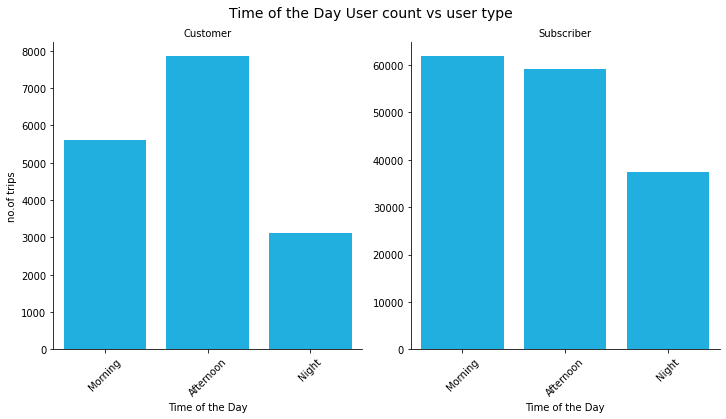

In [36]:
day_time = ['Morning', 'Afternoon', 'Night']
g = sns.catplot(data=df, x='time_of_day', col="user_type", kind='count', sharey = False,
            color = 'deepskyblue', order = day_time)
g.set_axis_labels("Time of the Day", "no.of trips")
g.set_titles("{col_name}")
g.fig.suptitle('Time of the Day User count vs user type', y=1.03, fontsize=14, )
g.set_xticklabels(rotation = 45);

*Per the plot, time of the day with most trips was Morning and afternoon for subscribers and that of customers was afternoon which makes time of the day slightly dependent on if a user is a subscriber or a customer.
This again seems to confirmed our assertion that subscribers might be using the system for work and home commute purposes while customers use it for recreational activities.*


### What is the average trip duration base on day of the week?

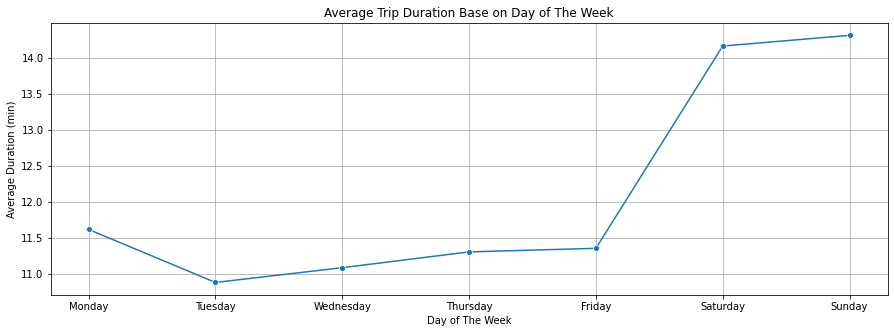

In [42]:
#get mean of trip duration for each day of the week
average_trip_duration = df[['day_of_week','duration_min']].groupby(['day_of_week'],as_index= False).mean()


plt.figure(figsize=[15,5])
# set categorical order
df['day_of_week'] = pd.Categorical(df['day_of_week'],
                                   categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                   ordered=True)

# plot a line plot
sns.lineplot(data=average_trip_duration, x='day_of_week', y='duration_min',marker='o', sort=False)
plt.ylabel('Average Duration (min)');
plt.xlabel('Day of The Week')
plt.grid()
plt.title('Average Trip Duration Base on Day of The Week')
plt.show()

*Once again weekends had the highest average trip durations as against the weekdays. This is a confirmation that most trips done on weekends were for laissure and recreational purposes.*

### What is the average trip duration base on age group?

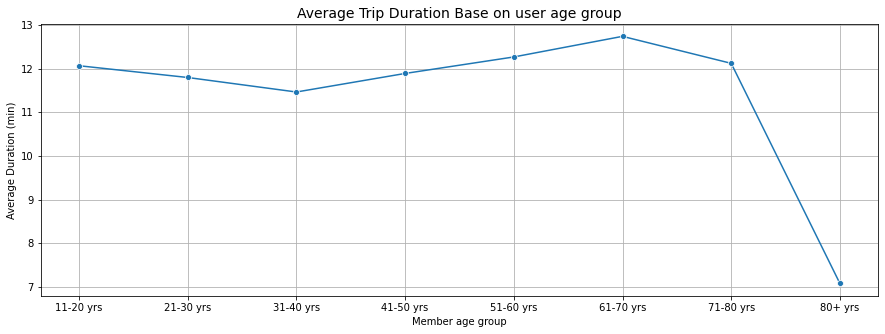

In [38]:
#get mean of trip duration for each day of the week
average_trip_duration = df[['Age_group','duration_min']].groupby(['Age_group'],as_index= False).mean()

# plot a line plot
plt.figure(figsize=[15,5])
sns.lineplot(data=average_trip_duration, x='Age_group', y='duration_min',marker='o')
plt.ylabel('Average Duration (min)');
plt.xlabel('Member age group')
plt.grid()
plt.title('Average Trip Duration Base on user age group', fontsize=14)
plt.show()

*In this line plot, older age group (51 - 80 years) has the highest average trips made as seen. This against is seems to suggest the idea that trips with high average were those coming from customers who just use the service for recreational activities.*

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Subscribers and customers use the service for differently:
1. The day of the week with most trips (Thursday) is NOT dependent on a user type. However it was discovered that Subscribers mostly used the service on weekkdays (Monday - Friday), while customers service usage saw a huge increment on Saturday and Sunday
2. Customers rides were more likely to last more than one hour compared to subscribers.
3. Customers often start the trip in the afternoon where as Subscribers starts mostly in the morning followed by afternoon.
4. Weekend has the highest average trip duration compare to weekdays
5. Older people had the highest average trip duration compare to the active working class


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It was largely obswerved that mojority of this service users were subscribers who rely on these bikes as means of transportation to and from work.

## Multivariate Exploration

### Variation of average trip duration in day of the week between customers and subscribers

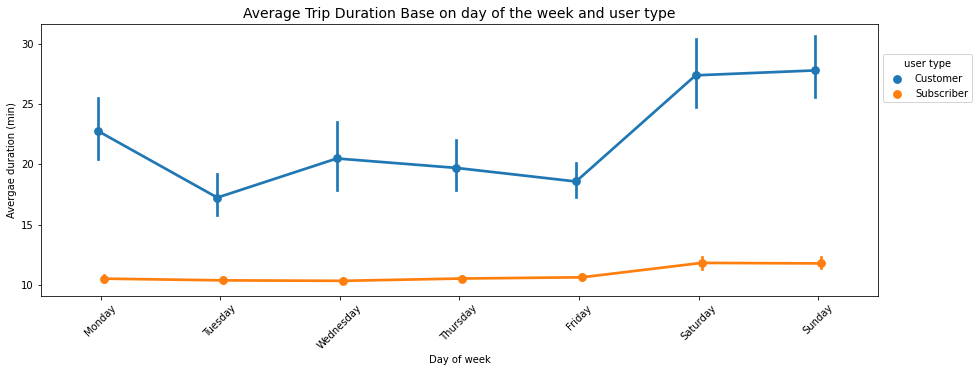

In [39]:
# two qualitative variables and one quantitave variable
# point plot for Average trip duration in day of week
# encode the user type with color encoding
plt.figure(figsize=[15,5])

sns.pointplot(data = df,x='day_of_week',y='duration_min',hue='user_type',dodge=True, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xlabel('Day of week')
plt.ylabel('Avergae duration (min)')
plt.legend(title = 'user type',loc = 6, bbox_to_anchor = (1.0, 0.8));
plt.title('Average Trip Duration Base on day of the week and user type', fontsize=14)
plt.xticks(rotation = 45);

*It can be seen from the plot above that subscribers ride shorter distances compared to customers on each day of the week. Both user types have an obvious increase of trip duration on Saturdays and Sundays over weekdays.*

### Variation of average trip duration in day of the week between male, female and other gender

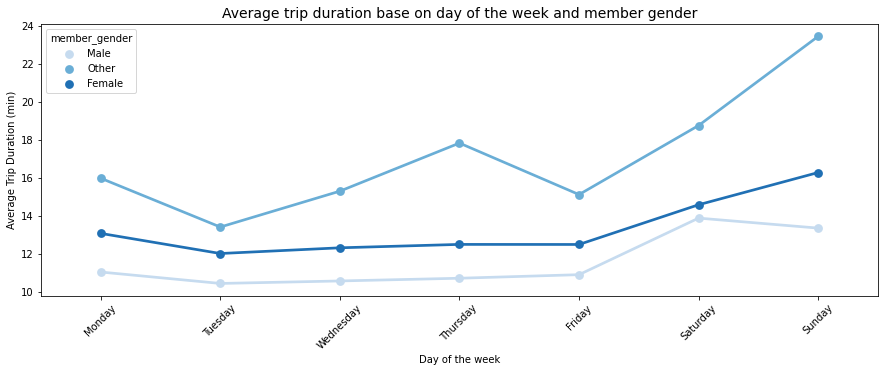

In [40]:
plt.figure(figsize = [15,5])

sns.pointplot(data = df, x = 'day_of_week', y = 'duration_min', hue = 'member_gender', palette = 'Blues', ci=None, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Average trip duration base on day of the week and member gender', fontsize=14)
plt.ylabel('Average Trip Duration (min)')
plt.xlabel('Day of the week')
plt.xticks(rotation = 45);

*Although, 'other' as used in the member gender were fewer in terms of numbers, they turned to have a high average trip durations through out the week.*

### Variation of average trip duration for age group  between male, female and others

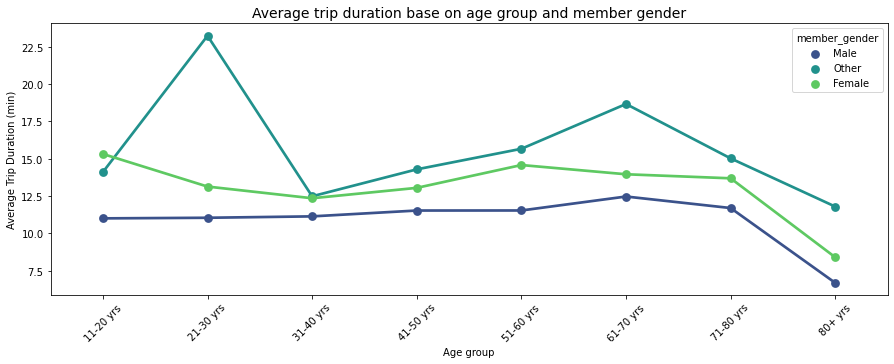

In [41]:
plt.figure(figsize = [15,5])

sns.pointplot(data = df, x = 'Age_group', y = 'duration_min', hue = 'member_gender', palette = 'viridis', ci=None, order=['11-20 yrs','21-30 yrs','31-40 yrs','41-50 yrs','51-60 yrs','61-70 yrs','71-80 yrs','80+ yrs'])
plt.title('Average trip duration base on age group and member gender', fontsize=14)
plt.ylabel('Average Trip Duration (min)')
plt.xlabel('Age group')
plt.xticks(rotation = 45);

*Female riders were doing more average trips in each age group compared to male riders. On the other hand, other riders had the most average trips done in each age group except at age 11-20 years.*

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>Investigation was extended to look at the dependency of the user_type on the average trip duration as well as days of the week and time of the day. 
A multivariate exploration plot dipicts that, there was indeed a dependency of the average trip duration on the user type. 
Almost all the graphs support the general hypothesis that customers were more likely to be using the services for recreational purposes while subcribers tend to use the services for working purposes.
Subscribers use the system mainly on weekdays while Customers engaged the system especially in the weekend.
For both user types, the distribution of rides during the weekdays depends a lot on the hour of the day and day of the week.


### Were there any interesting or surprising interactions between features?

> Although, 'other' as used in the member gender were fewer in terms of numbers, they turned to have a high average trip durations through out the week.


## Conclusions
 - Most trips were done at morning (00:00 - 11:59 hours) representing 38.5%, followed closely by afternoon (12:00 - 17:59 hours) representing 38.3%. Night had 23.2% of all users which is reasonable.
 - Also, male riders were more than 3 times that of female riders, males represent 74.6% of the trips made entire period and females represent only 23.3% while other had a share of 2.1%.
 - Most trip were done on midweek which is Thursday, this was followed by Tuesday and wednesday respectively. Weekends seem the list patronage of this service.
 - Most trips representing 90.5% were taken by subscribers with the remaining 9.5% being just casual riders. This shows that subscribers were making efficient use of thier subscription.
 - Mojority of the gobike users are between the ages of 21 to 40 years respectively as these age groups constitute almost 80% of all users.
 - All member gender having almost the same average age and containing a number of outliers.
 - The same average age for both subscribers and customers
 - Time of the day with most trips was Morning and afternoon for subscribers and that of customers was afternoon which makes time of the day slightly dependent on if a user is a subscriber or a customer. 
 - Subscribers ride shorter distances compared to customers on each day of the week. Both user types have an obvious increase of trip duration on Saturdays and Sundays over weekdays.

### References
1. www.stackoverflow.com
2. www.seaborn.pydata.org
3. www.github.com
4. www.datavizpyr.com
5. www.matplotlib.org